In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [167]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import ConfusionMatrixDisplay

In [3]:
df = pd.read_csv('clean_bankruptcy.csv')

In [4]:
df.head()

,Bankrupt,ROAC_before_interest_and_depreciation_before_interest,ROAA_before_interest_and__after_tax,ROAB_before_interest_and_depreciation_after_tax,Operating_Gross_Margin,Realized_Sales_Gross_Margin,Operating_Profit_Rate,Pretax_net_Interest_Rate,Aftertax_net_Interest_Rate,Nonindustry_income_and_expenditurerevenue,...,Current_Liability_to_Current_Assets,Net_Income_to_Total_Assets,Total_assets_to_GNP_price,Nocredit_Interval,Gross_Profit_to_Sales,Net_Income_to_Stockholders_Equity,Liability_to_Equity,Degree_of_Financial_Leverage_DFL,Interest_Coverage_Ratio_Interest_expense_to_EBIT,Equity_to_Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.118250,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.047775,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.025346,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.067250,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.047725,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,0.035490


In [5]:
X = df.drop('Bankrupt',axis=1)
y = df['Bankrupt']

In [9]:
X_mc = sm.add_constant(X)

vif = pd.DataFrame({
    'feature': X_mc.columns,
    'VIF': [variance_inflation_factor(X_mc.values, i) for i in range(X_mc.shape[1])]
})

vif = vif[vif['feature'] != 'const']
print(vif)

C:\Users\Hardik\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1783: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


                                              feature           VIF
1   ROAC_before_interest_and_depreciation_before_i...  6.842762e+01
2                 ROAA_before_interest_and__after_tax  4.439399e+01
3     ROAB_before_interest_and_depreciation_after_tax  1.030715e+02
4                              Operating_Gross_Margin  6.341551e+07
5                         Realized_Sales_Gross_Margin  1.073508e+03
..                                                ...           ...
89                  Net_Income_to_Stockholders_Equity  1.459339e+01
90                                Liability_to_Equity  4.669303e+02
91                   Degree_of_Financial_Leverage_DFL  1.005086e+00
92   Interest_Coverage_Ratio_Interest_expense_to_EBIT  1.007045e+00
93                                Equity_to_Liability  3.301610e+00

[93 rows x 2 columns]


In [10]:
features = list(X.columns)

In [13]:
vif_data = df[features]
total_cols = vif_data.shape[1]
cols_to_keep = []
threshold = 5
col_index = 0

for i in range(total_cols):
    val = variance_inflation_factor(vif_data,col_index)
    print(f"{i}: {val}")

    if val <= threshold:
        cols_to_keep.append(features[i])
        col_index += 1
    else:
        vif_data.drop(features[i],axis=1,inplace=True)

0: 68.42761633192671
1: 43.87769603829851
2: 12.108032401568549
3: 61373962.30244142
4: 1072.02176978665
5: 224910999.05919996
6: 1159.4298935638408
7: 350.00027188794047
8: 5.04923417595396
9: 1.6545338586097136
10: 1.2488977878604859
11: 1.085942523475904
12: 7.170662604839595
13: 1.0321194790112946
14: 1.1771554069041088
15: 773.887438275039
16: 3096.9978553425162
17: 3.1682501661367795
18: 21.603816101356387
19: 4.682441432134484
20: 2.0728293941760096
21: 600.7940018116207
22: 17.31083128194556
23: 1.0386249558315304
24: 13.967073181249585
25: 130.8721490436786
26: 1.685450269776119
27: 1.0221667236467142
28: 1.0875745237765573
29: 1.6256534041469803
30: 1.2409662266439259
31: 5.982513443294084
32: 1.4872756966736769
33: 1.0455090531862754
34: 1.008462419159263
35: 1.327260933230344
36: 1682786255.514612
37: 28.503275703005897
38: 1.4601595970954466
39: 36.053227914278345
40: 11.485504399203444
41: 6.071889229773481
42: 4.01000464260848
43: 32.240520674116624
44: 6.628052674858541

In [16]:
cols_to_keep

['Continuous_interest_rate_after_tax',
 'Operating_Expense_Rate',
 'Research_and_development_expense_rate',
 'Interestbearing_debt_interest_rate',
 'Tax_rate_A',
 'Net_Value_Per_Share_C',
 'Cash_Flow_Per_Share',
 'Revenue_Per_Share_Yuan_',
 'Realized_Sales_Gross_Profit_Growth_Rate',
 'Regular_Net_Profit_Growth_Rate',
 'Continuous_Net_Profit_Growth_Rate',
 'Total_Asset_Growth_Rate',
 'Net_Value_Growth_Rate',
 'Total_Asset_Return_Growth_Rate_Ratio',
 'Current_Ratio',
 'Quick_Ratio',
 'Interest_Expense_Ratio',
 'Total_debtTotal_net_worth',
 'Longterm_fund_suitability_ratio_A',
 'Net_profit_before_taxPaidin_capital',
 'Accounts_Receivable_Turnover',
 'Average_Collection_Days',
 'Inventory_Turnover_Rate_times',
 'Fixed_Assets_Turnover_Frequency',
 'Net_Worth_Turnover_Rate_times',
 'Revenue_per_person',
 'Operating_profit_per_person',
 'Allocation_rate_per_person',
 'Quick_AssetsTotal_Assets',
 'CashTotal_Assets',
 'Quick_AssetsCurrent_Liability',
 'CashCurrent_Liability',
 'Current_Liabilit

In [17]:
X_final = df[cols_to_keep]

## Feature Importance

In [42]:
fi = RandomForestClassifier(n_estimators=300)
fi.fit(X_final, y)

imp = pd.Series(fi.feature_importances_, index=X_final.columns)
top_features = imp.sort_values(ascending=False).head(30).index

In [43]:
imp

Continuous_interest_rate_after_tax                  0.025242
Operating_Expense_Rate                              0.015328
Research_and_development_expense_rate               0.010758
Interestbearing_debt_interest_rate                  0.021732
Tax_rate_A                                          0.003846
Net_Value_Per_Share_C                               0.027010
Cash_Flow_Per_Share                                 0.010888
Revenue_Per_Share_Yuan_                             0.012737
Realized_Sales_Gross_Profit_Growth_Rate             0.010501
Regular_Net_Profit_Growth_Rate                      0.012062
Continuous_Net_Profit_Growth_Rate                   0.012938
Total_Asset_Growth_Rate                             0.011876
Net_Value_Growth_Rate                               0.041985
Total_Asset_Return_Growth_Rate_Ratio                0.015414
Current_Ratio                                       0.016088
Quick_Ratio                                         0.019838
Interest_Expense_Ratio  

In [44]:
top_features

Index(['Net_Income_to_Stockholders_Equity', 'Net_Value_Growth_Rate',
       'Net_profit_before_taxPaidin_capital', 'Working_CapitalEquity',
       'Equity_to_Liability', 'Total_debtTotal_net_worth',
       'Net_Value_Per_Share_C', 'Interest_Expense_Ratio',
       'Continuous_interest_rate_after_tax',
       'Degree_of_Financial_Leverage_DFL',
       'Interest_Coverage_Ratio_Interest_expense_to_EBIT', 'CashTotal_Assets',
       'Total_incomeTotal_expense', 'Interestbearing_debt_interest_rate',
       'CashCurrent_Liability', 'Quick_Ratio',
       'Retained_Earnings_to_Total_Assets', 'InventoryWorking_Capital',
       'Operating_profit_per_person', 'Nocredit_Interval', 'Current_Ratio',
       'Total_assets_to_GNP_price', 'Quick_AssetsCurrent_Liability',
       'Total_Asset_Return_Growth_Rate_Ratio', 'Operating_Expense_Rate',
       'Revenue_per_person', 'Allocation_rate_per_person',
       'Fixed_Assets_Turnover_Frequency', 'Accounts_Receivable_Turnover',
       'Current_Liability_to_Ass

In [83]:
X_train,X_test,y_train,y_test = train_test_split(X_final,y,test_size=0.2,random_state=42)

In [84]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42,n_jobs=-1),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    )
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [85]:
results = []

for name, model in models.items():
    
    if name in ["Logistic Regression", "SVM"]:
        pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("model", model)
        ])
    else:
        pipe = Pipeline([
            ("model", model)
        ])
    
    cv_results = cross_validate(
        pipe, X_train, y_train,
        cv=cv,
        scoring=scoring,
        return_train_score=False,
        n_jobs=-1
    )
    
    results.append({
        "Model": name,
        "Accuracy": np.mean(cv_results['test_accuracy']),
        "Precision": np.mean(cv_results['test_precision']),
        "Recall": np.mean(cv_results['test_recall']),
        "F1 Score": np.mean(cv_results['test_f1'])
    })

results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.860868,0.158425,0.771429,0.262556
4,SVM,0.893541,0.179491,0.645714,0.280129
1,Decision Tree,0.953193,0.278388,0.291429,0.282780
5,XGBoost,0.970631,0.684314,0.217143,0.317278
3,Gradient Boosting,0.966592,0.475946,0.211429,0.285144
2,Random Forest,0.968061,0.481905,0.097143,0.157160


In [86]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced'),
    "Decision Tree": DecisionTreeClassifier(class_weight='balanced', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=300, class_weight='balanced', random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=5,
        learning_rate=0.05,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        scale_pos_weight=(y==0).sum()/(y==1).sum(),
        random_state=42
    )
}

scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [87]:
results = []

for name, model in models.items():
    
    if name in ["Logistic Regression", "SVM"]:
        pipe = ImbPipeline([
            ("scaler", StandardScaler()),
            ("smote", SMOTE(random_state=42)),
            ("model", model)
        ])
    else:
        pipe = ImbPipeline([
            ("smote", SMOTE(random_state=42)),
            ("model", model)
        ])
    
    cv_results = cross_validate(
        pipe, X_train, y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    
    results.append({
        "Model": name,
        "Accuracy": np.mean(cv_results['test_accuracy']),
        "Precision": np.mean(cv_results['test_precision']),
        "Recall": np.mean(cv_results['test_recall']),
        "F1 Score": np.mean(cv_results['test_f1'])
    })

results_df = pd.DataFrame(results).sort_values(by="Recall", ascending=False)
results_df

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.860133,0.154339,0.748571,0.255621
5,XGBoost,0.946952,0.337360,0.657143,0.444850
3,Gradient Boosting,0.937956,0.296277,0.640000,0.402822
4,SVM,0.901434,0.183195,0.594286,0.278906
2,Random Forest,0.960351,0.409642,0.497143,0.444981
1,Decision Tree,0.936307,0.227764,0.411429,0.292906


## Hyperparameter Tuning

In [88]:
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

## Logistic Regression

In [111]:
log_pipe = ImbPipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(class_weight='balanced', max_iter=2000))
])

log_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l1', 'l2'],
    'model__solver': ['liblinear']
}

log_grid = GridSearchCV(
    log_pipe,
    log_param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1
)

In [112]:
log_grid.fit(X_train,y_train)

,estimator,Pipeline(step..._iter=2000))])
,param_grid,"{'model__C': [0.01, 0.1, ...], 'model__penalty': ['l1', 'l2'], 'model__solver': ['liblinear']}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


In [113]:
print(log_grid.best_score_)
print(log_grid.best_params_)

0.2638530757851201
{'model__C': 0.1, 'model__penalty': 'l1', 'model__solver': 'liblinear'}


## Random Forest

In [108]:
rf_pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(class_weight='balanced', random_state=42, n_jobs=-1))
])

rf_param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 3],
    'model__max_features': ['sqrt', 'log2']
}

rf_grid = GridSearchCV(
    rf_pipe,
    rf_param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1
)

In [109]:
rf_grid.fit(X_train,y_train)

,estimator,Pipeline(step...m_state=42))])
,param_grid,"{'model__max_depth': [None, 10, ...], 'model__max_features': ['sqrt', 'log2'], 'model__min_samples_leaf': [1, 3], 'model__min_samples_split': [2, 5], ...}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [110]:
print(rf_grid.best_score_)
print(rf_grid.best_params_)

0.4663948972212861
{'model__max_depth': None, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 3, 'model__min_samples_split': 2, 'model__n_estimators': 400}


## XGBoost

In [115]:
xgb_pipe = ImbPipeline([
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_param_grid = {
    'model__n_estimators': [200, 400],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

xgb_grid = GridSearchCV(
    xgb_pipe,
    xgb_param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1
)

In [116]:
xgb_grid.fit(X_train,y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__colsample_bytree': [0.8, 1.0], 'model__learning_rate': [0.05, 0.1], 'model__max_depth': [3, 5, ...], 'model__n_estimators': [200, 400], ...}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,'auto'


In [117]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.48977901687322145
{'model__colsample_bytree': 0.8, 'model__learning_rate': 0.1, 'model__max_depth': 7, 'model__n_estimators': 200, 'model__subsample': 0.8}


## Summary

In [118]:
def extract_metrics(grid, model_name):
    idx = grid.best_index_
    return {
        "Model": model_name,
        "Accuracy": grid.cv_results_['mean_test_accuracy'][idx],
        "Precision": grid.cv_results_['mean_test_precision'][idx],
        "Recall": grid.cv_results_['mean_test_recall'][idx],
        "F1": grid.cv_results_['mean_test_f1'][idx],
        "Best Params": grid.best_params_
    }

summary = pd.DataFrame([
    extract_metrics(log_grid, "Logistic Regression"),
    extract_metrics(rf_grid, "Random Forest"),
    extract_metrics(xgb_grid, "XGBoost")
])

summary

,Model,Accuracy,Precision,Recall,F1,Best Params
0,Logistic Regression,0.861785,0.159310,0.771429,0.263853,"{'model__C': 0.1, 'model__penalty': 'l1', 'mod..."
1,Random Forest,0.957414,0.396105,0.577143,0.466395,"{'model__max_depth': None, 'model__max_feature..."
2,XGBoost,0.966225,0.486252,0.502857,0.489779,"{'model__colsample_bytree': 0.8, 'model__learn..."


## Threshold Tuning

In [122]:
def threshold_tuning(model, X_test, y_test, thresholds=np.linspace(0.05, 0.5, 50), model_name="Model"):
    y_prob = model.predict_proba(X_test)[:, 1]
    
    rows = []
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        rows.append({
            "Model": model_name,
            "Threshold": t,
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred)
        })
    
    return pd.DataFrame(rows)

In [166]:
best_log = log_grid.best_estimator_
best_rf = rf_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_

In [125]:
log_thresh_df = threshold_tuning(best_log, X_test, y_test, model_name="Logistic Regression")
rf_thresh_df = threshold_tuning(best_rf, X_test, y_test, model_name="Random Forest")
xgb_thresh_df = threshold_tuning(best_xgb, X_test, y_test, model_name="XGBoost")

In [126]:
log_thresh_df

,Model,Threshold,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.050000,0.485693,0.051491,0.974359,0.097812
1,Logistic Regression,0.059184,0.504035,0.053296,0.974359,0.101064
2,Logistic Regression,0.068367,0.524578,0.055474,0.974359,0.104972
3,Logistic Regression,0.077551,0.549523,0.058372,0.974359,0.110145
4,Logistic Regression,0.086735,0.567131,0.060606,0.974359,0.114114
5,Logistic Regression,0.095918,0.582539,0.062706,0.974359,0.117829
6,Logistic Regression,0.105102,0.597946,0.064957,0.974359,0.121795
7,Logistic Regression,0.114286,0.621423,0.068716,0.974359,0.128378
8,Logistic Regression,0.123469,0.630961,0.070370,0.974359,0.131261
9,Logistic Regression,0.132653,0.644901,0.072937,0.974359,0.135714


In [127]:
rf_thresh_df

,Model,Threshold,Accuracy,Precision,Recall,F1
0,Random Forest,0.050000,0.690389,0.082789,0.974359,0.152610
1,Random Forest,0.059184,0.716067,0.089623,0.974359,0.164147
2,Random Forest,0.068367,0.732942,0.094763,0.974359,0.172727
3,Random Forest,0.077551,0.751284,0.101064,0.974359,0.183133
4,Random Forest,0.086735,0.769626,0.108262,0.974359,0.194872
5,Random Forest,0.095918,0.786500,0.115854,0.974359,0.207084
6,Random Forest,0.105102,0.800440,0.122977,0.974359,0.218391
7,Random Forest,0.114286,0.810712,0.128814,0.974359,0.227545
8,Random Forest,0.123469,0.818782,0.133803,0.974359,0.235294
9,Random Forest,0.132653,0.826119,0.136029,0.948718,0.237942


In [128]:
xgb_thresh_df

,Model,Threshold,Accuracy,Precision,Recall,F1
0,XGBoost,0.050000,0.923698,0.255639,0.871795,0.395349
1,XGBoost,0.059184,0.930301,0.270492,0.846154,0.409938
2,XGBoost,0.068367,0.934703,0.284483,0.846154,0.425806
3,XGBoost,0.077551,0.940572,0.305556,0.846154,0.448980
4,XGBoost,0.086735,0.940572,0.305556,0.846154,0.448980
5,XGBoost,0.095918,0.942773,0.314286,0.846154,0.458333
6,XGBoost,0.105102,0.942773,0.310680,0.820513,0.450704
7,XGBoost,0.114286,0.945708,0.323232,0.820513,0.463768
8,XGBoost,0.123469,0.946442,0.326531,0.820513,0.467153
9,XGBoost,0.132653,0.945708,0.319588,0.794872,0.455882


In [130]:
threshold_results_df = pd.concat([log_thresh_df, rf_thresh_df, xgb_thresh_df], ignore_index=True)
threshold_results_df

,Model,Threshold,Accuracy,Precision,Recall,F1
0,Logistic Regression,0.050000,0.485693,0.051491,0.974359,0.097812
1,Logistic Regression,0.059184,0.504035,0.053296,0.974359,0.101064
2,Logistic Regression,0.068367,0.524578,0.055474,0.974359,0.104972
3,Logistic Regression,0.077551,0.549523,0.058372,0.974359,0.110145
4,Logistic Regression,0.086735,0.567131,0.060606,0.974359,0.114114
...,...,...,...,...,...,...
145,XGBoost,0.463265,0.966251,0.436364,0.615385,0.510638
146,XGBoost,0.472449,0.966985,0.444444,0.615385,0.516129
147,XGBoost,0.481633,0.966985,0.444444,0.615385,0.516129
148,XGBoost,0.490816,0.967718,0.452830,0.615385,0.521739


In [135]:
threshold_results_df[threshold_results_df["Recall"] >= 0.75] \
    .sort_values(["Model", "F1"], ascending=[True, False]) \
    .groupby("Model").head(1)

,Model,Threshold,Accuracy,Precision,Recall,F1
49,Logistic Regression,0.500000,0.863536,0.161290,0.897436,0.273438
96,Random Forest,0.472449,0.953778,0.357143,0.769231,0.487805
118,XGBoost,0.215306,0.956713,0.375000,0.769231,0.504202


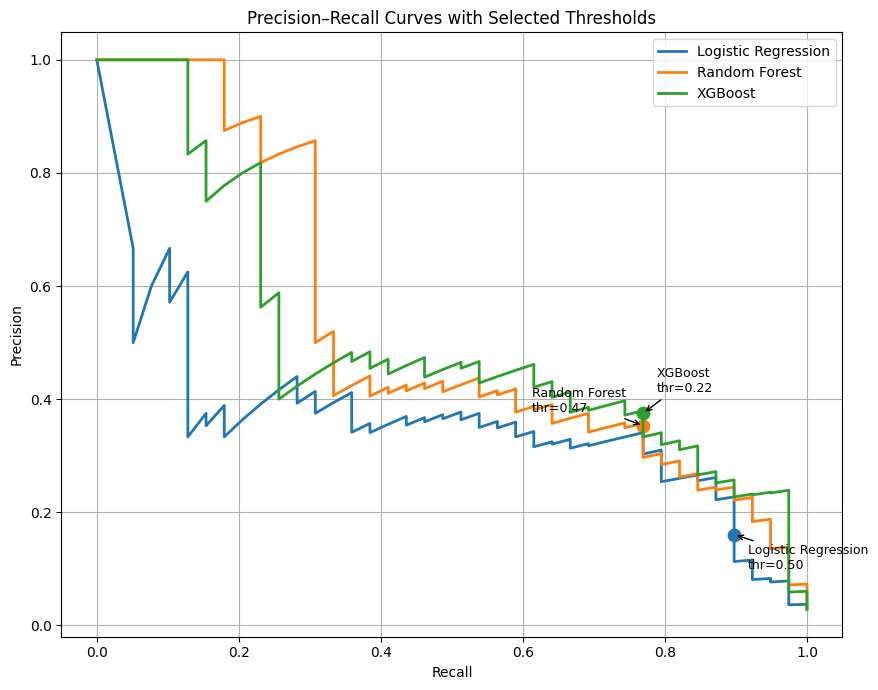

In [168]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

models_and_thresholds = [
    ("Logistic Regression", best_log, 0.50, (10, -25)),
    ("Random Forest", best_rf, 0.472449, (-80, 10)),
    ("XGBoost", best_xgb, 0.215306, (10, 15))
]

plt.figure(figsize=(9, 7))

for name, model, chosen_threshold, offset in models_and_thresholds:
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_prob)
    
    plt.plot(recall, precision, linewidth=2, label=name)
    
    idx = (abs(thresholds - chosen_threshold)).argmin()
    
    plt.scatter(recall[idx], precision[idx], s=80)
    plt.annotate(
        f"{name}\nthr={chosen_threshold:.2f}",
        (recall[idx], precision[idx]),
        textcoords="offset points",
        xytext=offset,
        arrowprops=dict(arrowstyle="->", lw=1),
        fontsize=9
    )

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves with Selected Thresholds")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.savefig("pr_curve.png", dpi=300, bbox_inches="tight")
plt.show()

In [141]:
final_model = best_xgb
threshold = 0.215306

In [144]:
y_prob_train = final_model.predict_proba(X_train)[:,1]
y_pred_train = (y_prob >= threshold).astype(int)

In [146]:
def evaluate_model(y_true, y_prob, threshold, dataset_name="Dataset"):
    y_pred = (y_prob >= threshold).astype(int)
    
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred)
    
    print(f"\n===== {dataset_name} Evaluation =====")
    print(f"Accuracy : {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall   : {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")
    print("\nConfusion Matrix:")
    print(cm)
    print("\nClassification Report:")
    print(report)
    
    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
        "Confusion Matrix": cm
    }

In [147]:
y_prob_train = final_model.predict_proba(X_train)[:, 1]
train_metrics = evaluate_model(y_train, y_prob_train, threshold, "Training Set")


===== Training Set Evaluation =====
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000

Confusion Matrix:
[[5273    0]
 [   0  175]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5273
           1       1.00      1.00      1.00       175

    accuracy                           1.00      5448
   macro avg       1.00      1.00      1.00      5448
weighted avg       1.00      1.00      1.00      5448



In [148]:
y_prob_test = final_model.predict_proba(X_test)[:, 1]
test_metrics = evaluate_model(y_test, y_prob_test, threshold, "Test Set")


===== Test Set Evaluation =====
Accuracy : 0.9567
Precision: 0.3750
Recall   : 0.7692
F1 Score : 0.5042

Confusion Matrix:
[[1274   50]
 [   9   30]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1324
           1       0.38      0.77      0.50        39

    accuracy                           0.96      1363
   macro avg       0.68      0.87      0.74      1363
weighted avg       0.98      0.96      0.96      1363



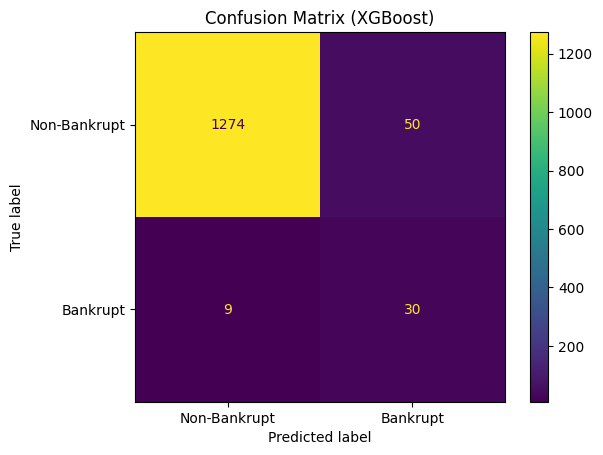

In [169]:
ConfusionMatrixDisplay.from_predictions(
    y_test,
    (y_prob >= chosen_threshold).astype(int),
    display_labels=["Non-Bankrupt", "Bankrupt"]
)

plt.title("Confusion Matrix (XGBoost)")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches="tight")
plt.show()

## Handling Overfitting

In [163]:
def threshold_tuning_results(y_true, y_prob, thresholds=np.linspace(0.05, 0.5, 50)):
    rows = []
    
    for t in thresholds:
        y_pred = (y_prob >= t).astype(int)
        rows.append({
            "Threshold": t,
            "Accuracy": accuracy_score(y_true, y_pred),
            "Precision": precision_score(y_true, y_pred),
            "Recall": recall_score(y_true, y_pred),
            "F1": f1_score(y_true, y_pred)
        })
    
    return pd.DataFrame(rows)

In [160]:
xgb_balanced_pipe = ImbPipeline([
    ('smote', SMOTE(sampling_strategy=0.3, random_state=42)),
    ('model', XGBClassifier(
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1
    ))
])

xgb_balanced_param_grid = {
    'model__n_estimators': [200, 300],
    'model__max_depth': [3, 4, 5],
    'model__learning_rate': [0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0],
    'model__min_child_weight': [1, 3],
    'model__gamma': [0, 1]
}

In [161]:
xgb_balanced_grid = GridSearchCV(
    xgb_balanced_pipe,
    xgb_balanced_param_grid,
    scoring=scoring,
    refit='f1',
    cv=cv,
    n_jobs=-1
)

xgb_balanced_grid.fit(X_train, y_train)

,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'model__colsample_bytree': [0.8, 1.0], 'model__gamma': [0, 1], 'model__learning_rate': [0.05, 0.1], 'model__max_depth': [3, 4, ...], ...}"
,scoring,"{'accuracy': 'accuracy', 'f1': 'f1', 'precision': 'precision', 'recall': 'recall'}"
,n_jobs,-1
,refit,'f1'
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,sampling_strategy,0.3


In [165]:
balanced_xgb = xgb_balanced_grid.best_estimator_
y_prob = balanced_xgb.predict_proba(X_test)[:,1]

threshold_df = threshold_tuning_results(y_test, y_prob)
threshold_df.sort_values(by="F1", ascending=False).head()

,Threshold,Accuracy,Precision,Recall,F1
47,0.481633,0.960382,0.377049,0.589744,0.460000
46,0.472449,0.959648,0.370968,0.589744,0.455446
45,0.463265,0.958914,0.365079,0.589744,0.450980
48,0.490816,0.960382,0.372881,0.564103,0.448980
25,0.279592,0.944974,0.312500,0.769231,0.444444
